In [1]:
 %matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
client = Client("IRIS")
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np
import math

In [2]:
#waveform function to make importing data easier
def waveforms(starttime, adj_endtime):
    start_t = UTCDateTime(starttime)
    end_t = start_t + adj_endtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def short_waveforms(starttime, endtime):
    start_t = UTCDateTime(starttime)
    end_t = UTCDateTime(endtime)
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text
    
def waveform_plotter(date, filtered, event, ax, ylim = False, channels = [0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        offset = channel * np.full(len(filtered[channel]), fill_value=200) 
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#1f77b4", alpha = 0.7)
        elif code == 'BHV':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#ff7f0e", alpha = 0.7)
        elif code == 'BHW':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#2ca02c", alpha = 0.7)
        else:
            ax.plot(t, filtered[channel].data + offset, label="Unknown " + code, color = "black", alpha = 0.7)
    
    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    
    if ylim == True:
        ax.set_ylim(-800,1000)

    ax.set_title("S0" + event + "\n" + "UTC " + d, size=10)
    
def xyz_plotter(date, filtered, event, ax, ylim = False, channels=[0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            U = filtered[channel].data
        elif code == 'BHV':
            V = filtered[channel].data
        elif code == 'BHW':
            W = filtered[channel].data
            
    h1 = (-2)*U + V + W
    h2 = math.sqrt(3)*V - math.sqrt(3)*W
    z = math.sqrt(2)*U + math.sqrt(2)*V + math.sqrt(2)*W

    offset = np.full(len(z), fill_value=500)

    ax.plot(t, h1 + 2*offset, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
    ax.plot(t, h2 + offset, label='Horizontal 2', color = "#aff8d8", alpha = 0.8)
    ax.plot(t, z, label = 'Vertical', color = "#ffabab", alpha = 0.8)


    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

    if ylim == True:
        ax.set_ylim(-1800,2000)

    ax.set_title("S0" + event + "\n" + "UTC " + d, size=10)

<IPython.core.display.Javascript object>


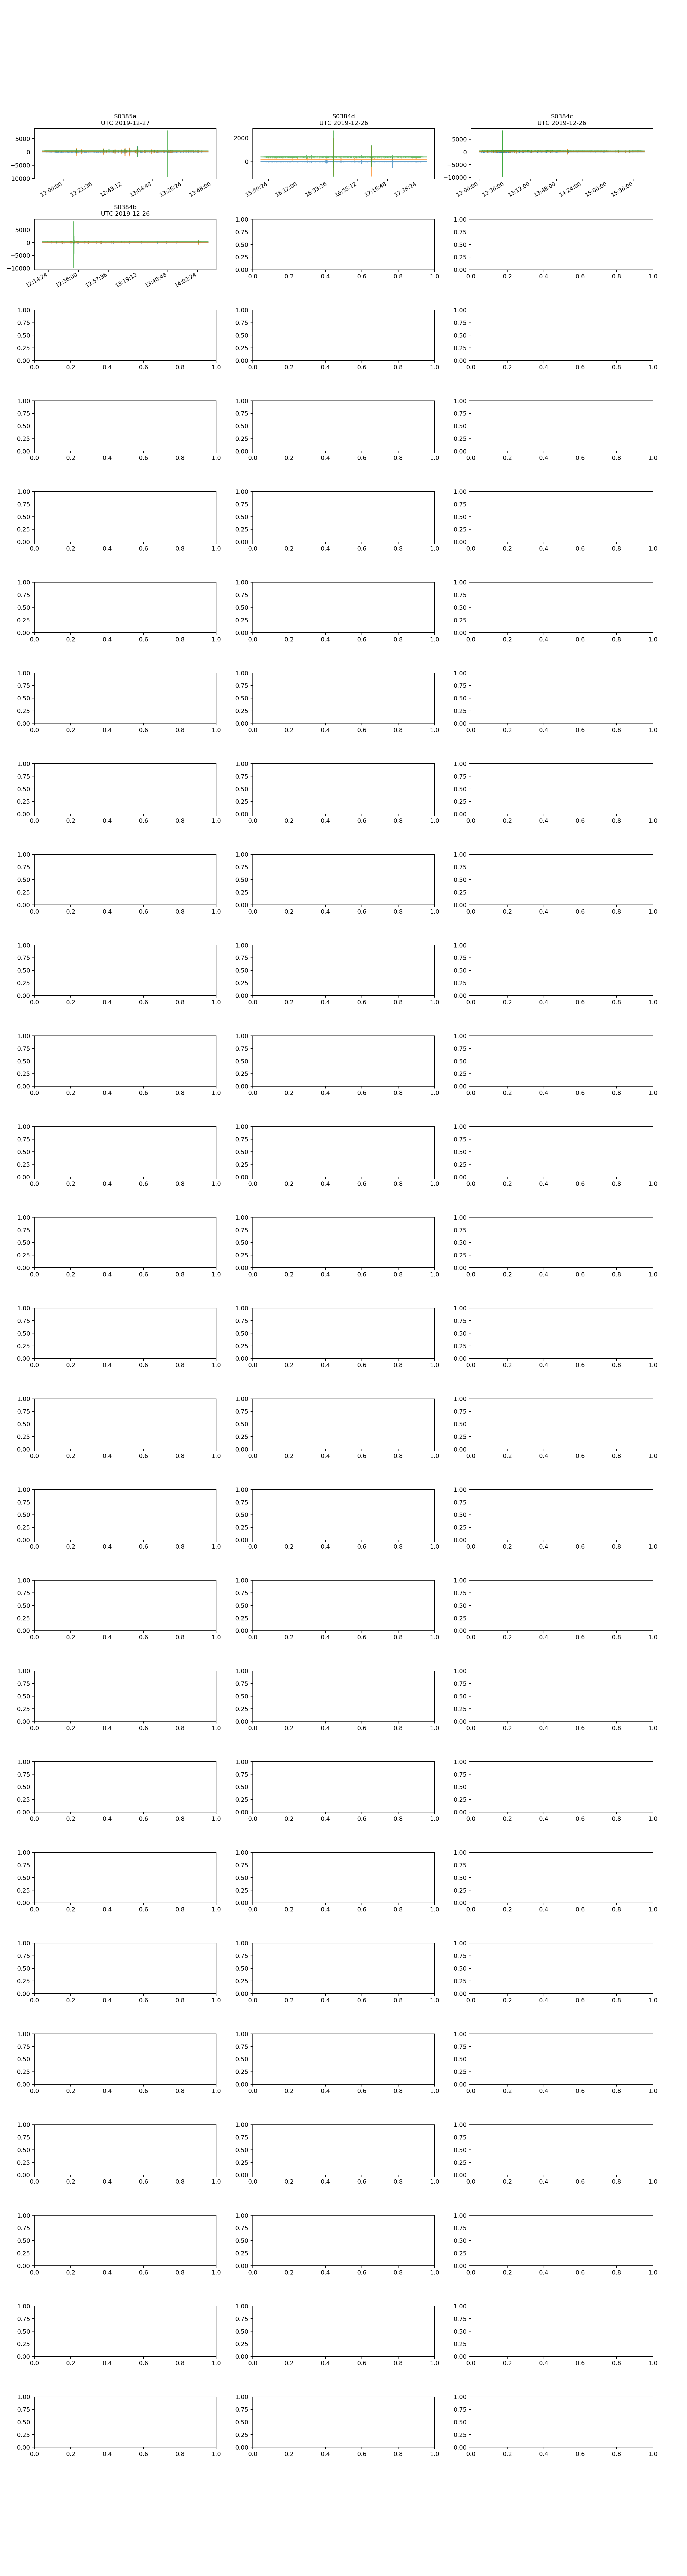

<IPython.core.display.Javascript object>


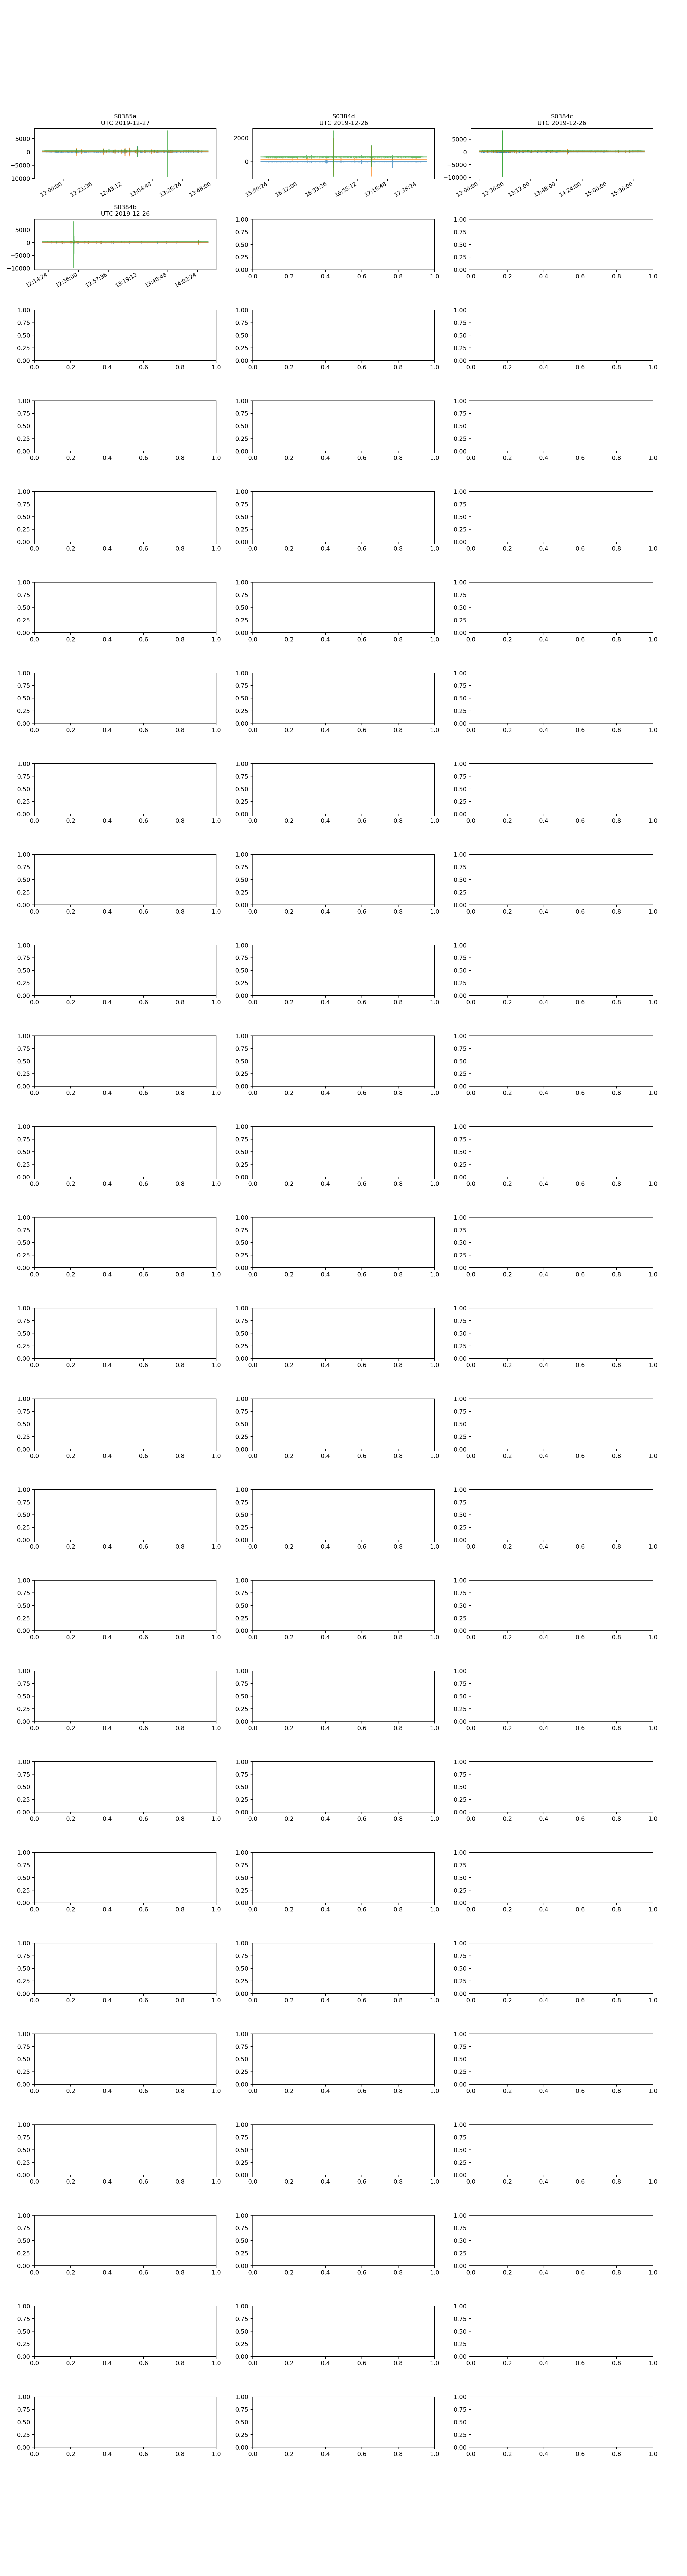

<IPython.core.display.Javascript object>


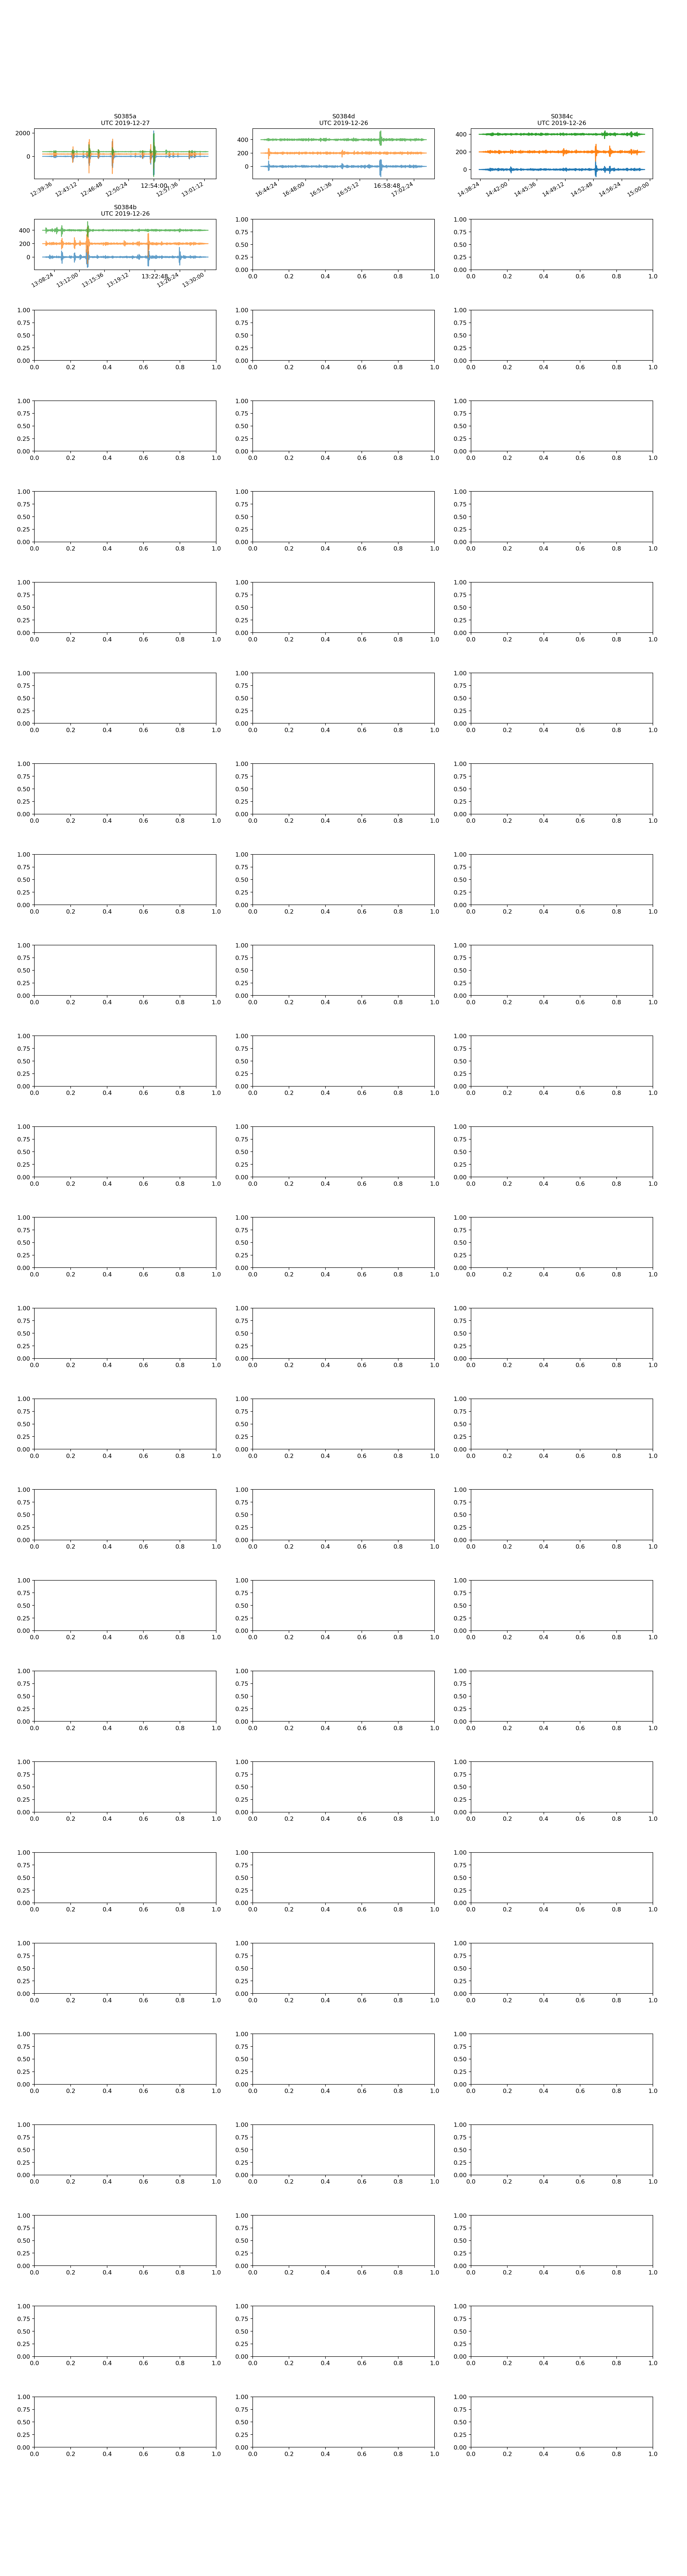

<IPython.core.display.Javascript object>


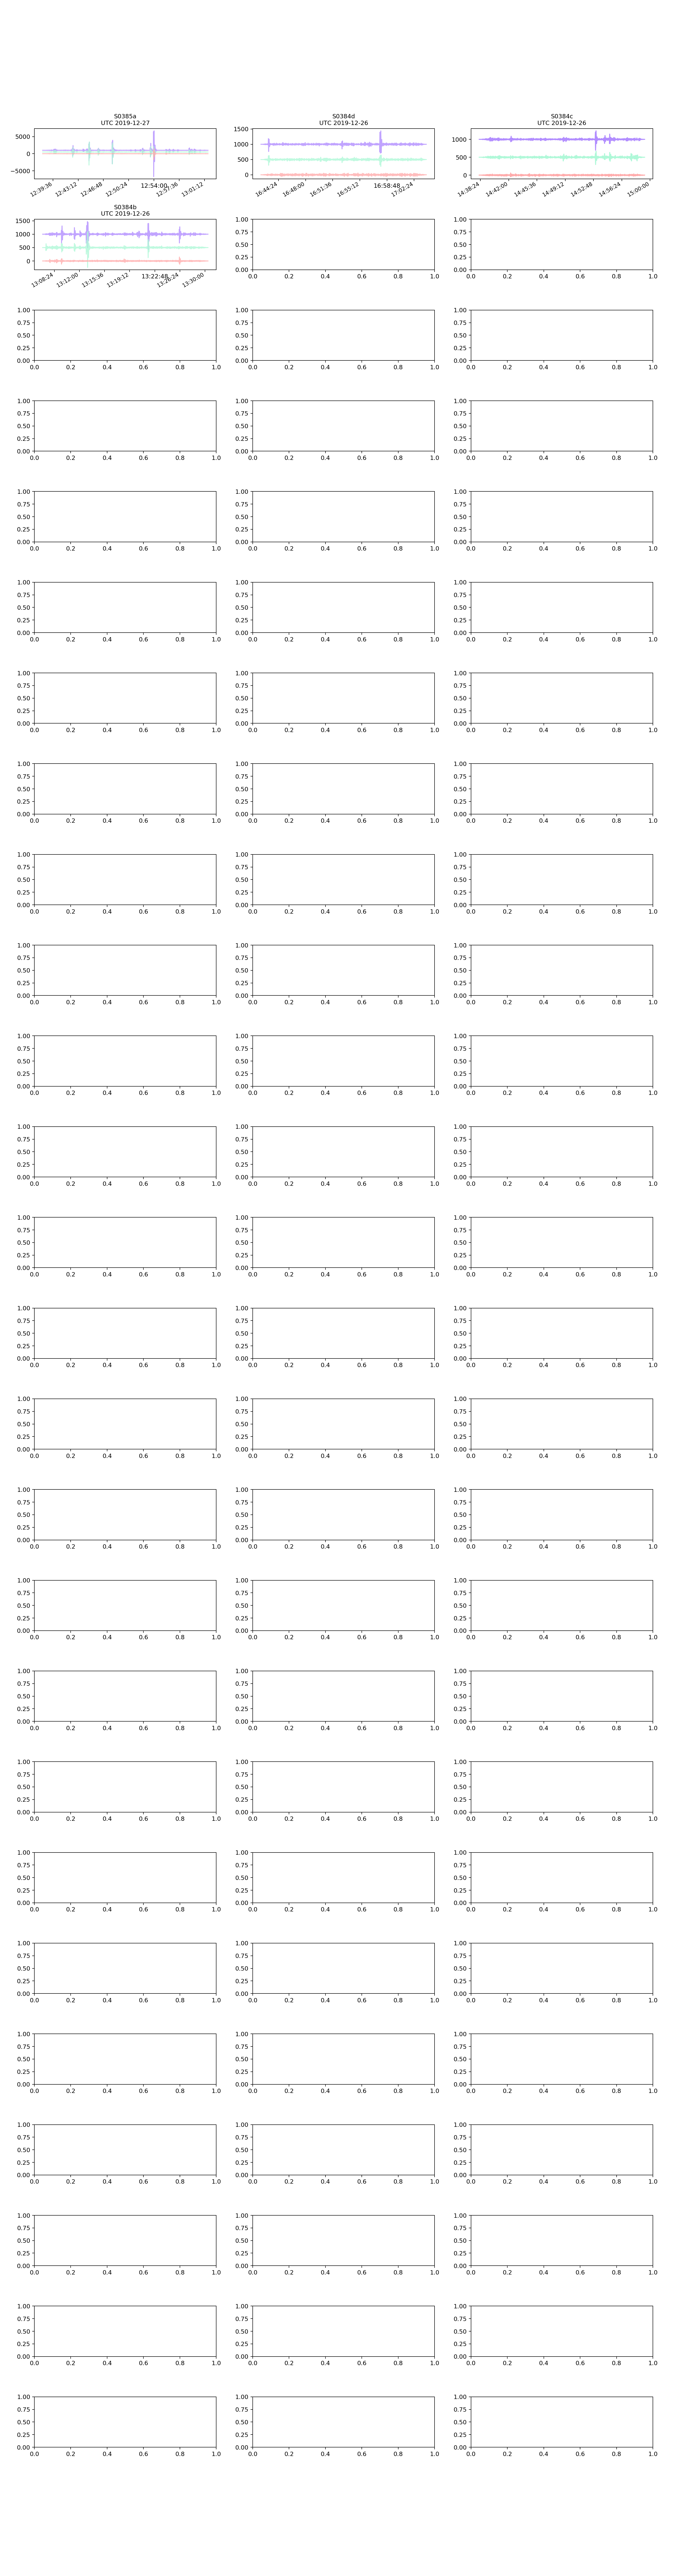

In [16]:
#2hr window + filtered
fig1,ax = plt.subplots(26,3, figsize=(16,60))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#2hr window + unfiltered
fig2,ax1 = plt.subplots(26,3, figsize=(16,60))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#20min window + filtered
fig3,ax2 = plt.subplots(26,3, figsize=(16,60))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#Z12 20min window + filtered
fig4,ax3 = plt.subplots(26,3, figsize=(16,60))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

***
***
***

# S0385a (C)
### 2019-12-27T12:37:42
Energy @ 12:41:08 - 12:58:43

Pg @ 12:41:12

Sg @ 12:45:30

In [17]:
t_385a = '2019-12-27T11:45:00'
st_385a = waveforms(t_385a, 7200)
f_385a = waveform_filter(st_385a, 'hf')
waveform_plotter(t_385a, f_385a, '385a', ax[0][0])

waveform_plotter(t_385a, st_385a, '385a', ax1[0][0])

st2_385a = short_waveforms('2019-12-27T12:38:08', '2019-12-27T13:01:43')
f2_385a = waveform_filter(st2_385a, 'hf')
waveform_plotter(t_385a, f2_385a, '385a', ax2[0][0])

xyz_plotter(t_385a, f2_385a, '385a', ax3[0][0])

***
***

# S0384d (C)
### 2019-12-26T16:38:20
Energy @ 16:45:04 - 17:01:01

Pg @ 16:45:46

Sg @ 16:50:56

In [18]:
t_384d = '2019-12-26T15:45:00'
st_384d = waveforms(t_384d, 7200)
f_384d = waveform_filter(st_384d, 'hf')
waveform_plotter(t_384d, f_384d, '384d', ax[0][1])

waveform_plotter(t_384d, st_384d, '384d', ax1[0][1])

st2_384d = short_waveforms('2019-12-26T16:42:04', '2019-12-26T17:04:01')
f2_384d = waveform_filter(st2_384d, 'hf')
waveform_plotter(t_384d, f2_384d, '384d', ax2[0][1])

xyz_plotter(t_384d, f2_384d, '384d', ax3[0][1])

***
***

# S0384c (C)
### 2019-12-26T13:04:26
Energy @ 14:51:10 - 15:06:45

Pg @ 14:51:15

Sg @ 14:56:18

In [22]:
t_384c = '2019-12-26T13:51:00'
st_384c = waveforms(t_384c, 7200)
f_384c = waveform_filter(st_384c, 'hf')
waveform_plotter(t_384c, f_384c, '384c', ax[0][2])

waveform_plotter(t_384c, st_384c, '384c', ax1[0][2])

st2_384c = short_waveforms('2019-12-26T14:38:15', '2019-12-26T14:59:18')
f2_384c = waveform_filter(st2_384c, 'hf')
waveform_plotter(t_384c, f2_384c, '384c', ax2[0][2])

xyz_plotter(t_384c, f2_384c, '384c', ax3[0][2])

***
***

# S0384b <span style='color:Orange'> (B)  </span>
### 2019-12-26T13:04:26
Energy @ 13:09:43 - 13:27:26

Pg @ 13:09:44

Sg @ 13:13:56

In [23]:
t_384b = '2019-12-26T12:10:00'
st_384b = waveforms(t_384b, 7200)
f_384b = waveform_filter(st_384b, 'hf')
waveform_plotter(t_384b, f_384b, '384b', ax[1][0])

waveform_plotter(t_384b, st_384b, '384b', ax1[1][0])

st2_384b = short_waveforms('2019-12-26T13:06:43', '2019-12-26T13:30:26')
f2_384b = waveform_filter(st2_384b, 'hf')
waveform_plotter(t_384b, f2_384b, '384b', ax2[1][0])

xyz_plotter(t_384b, f2_384b, '384b', ax3[1][0])

***
***

# S0375a (C)
### 2019-12-17T10:13:55
Energy @ 10:13:46 - 10:31:36

Pg @ 10:13:49

Sg @ 10:18:37

In [ ]:
t_375a = '2019-12-17T09:20:00'
st_375a = waveforms(t_375a, 7200)
f_375a = waveform_filter(st_375a, 'hf')
waveform_plotter(t_375a, f_375a, '375a', ax[1][1])

waveform_plotter(t_375a, st_375a, '375a', ax1[1][1])

st2_375a = short_waveforms('2019-12-17T10:10:46', '2019-12-17T10:34:36')
f2_375a = waveform_filter(st)

***
***

# S0371b <span style='color:Orange'> (B)  </span>
### 2019-12-13T08:23:51
Energy @ 08:31:10 - 08:49:29

Pg @ 08:31:18

Sg @ 08:35:43

***
***

# S0363d (C)
### 2019-12-05T01:33:11
Energy @ 01:38:52 - 01:57:58

***
***

# S0361c <span style='color:Orange'> (B)  </span>
### 2019-12-03T00:40:48
Energy @ 00:44:57 - 01:02:27

Pg @ 00:44:59

Sg @ 00:49:34

***
***

# S0360b (D)
### 2019-12-01T23:50:56
Energy @ 23:54:53 - 00:11:54

Pg @ 23:54:54

Sg @ 00:03:16

***
***

# S0352a <span style='color:Orange'> (B)  </span>
### 2019-11-23T18:14:20 
Energy @ 18:18:13 - 18:37:02

Pg @ 18:18:28

Sg @ 18:23:36

***
***

# S0351b (C)
### 2019-11-22T17:40:33
Energy @ 17:40:31 - 17:56:44

Pg @ 17:40:34

Sg @ 17:45:29

***
***

# S0349a <span style='color:Orange'> (B)  </span>
### 2019-11-20T17:09:14
Energy @ 17:12:29 - 17:29:55

Pg @ 17:12:52

Sg @ 17:17:28

***
***

# S0347a (C)
### 2019-11-18T14:47:32
Energy @ 14:50:40 - 15:12:21

Pg @ 14:50:47

Sg @ 14:55:06

***
***

# S0343b <span style='color:Orange'> (B)  </span>
### 2019-11-14T11:57:48
Energy @ 11:59:39 - 12:17:41

Pg @ 12:00:14

Sg @ 12:05:06

***
***

# S0340a <span style='color:Orange'> (B)  </span>
### 2019-11-11T09:49:03
Energy @ 09:57:57 - 10:13:55

Pg @ 09:58:05

Sg @ 10:02:59

***
***

# S0331a <span style='color:Orange'> (B)  </span>
### 2019-11-01T08:31:01
Energy @ 08:40:10 - 08:57:16

Pg @ 08:40:32

Sg @ 08:44:36

***
***

# S0327c <span style='color:Orange'> (B)  </span>
### 2019-10-29T03:55:01
Energy @ 04:03:06 - 04:15:50

Pg @ 04:03:12

Sg @ 04:06:31

***
***

# S0325b <span style='color:Orange'> (B)  </span>
### 2019-10-26T04:38:25
Energy @ 04:41:24 - 04:57:48

Pg @ 04:41:26

Sg @ 04:46:06

***
***

# S0324a (D)
### 2019-10-25T05:16:58
Energy @ 05:21:24 - 05:41:04

***
***

# S0323a <span style='color:Orange'> (B)  </span>
### 2019-10-24T21:08:41
Energy @ 21:41:01 - 21:30:35

Pg @ 21:14:03

Sg @ 21:18:14

***
***

# S0319b <span style='color:Orange'> (B)  </span>
### 2019-10-20T17:40:35
Energy @ 17:43:48 - 17:59:01

Pg @ 17:44:02

Sg @ 17:48:40

***
***

# S0319a <span style='color:Orange'> (B)  </span>
### 2019-10-20T03:24:42
Energy @ 03:25:48 - 03:40:46

Pg @ 03:26:02

Sg @ 03:30:17

***
***

# S0315b <span style='color:Orange'> (B)  </span>
### 2019-10-16T15:10:36
Energy @ 15:12:41 - 15:35:07

Pg @ 15:12:45

Sg @ 15:16:56

***
***

# S0314b <span style='color:Orange'> (B)  </span>
### 2019-10-15T15:36:28
Energy @ 15:41:36 - 15:58:03

Pg @ 15:41:52

Sg @ 15:46:08

***
***

# S0311a (C)
### 2019-10-12T13:10:00
Energy @ 13:11:05 - 13:29:38

Pg @ 13:11:29

Sg @ 13:16:14

***
***

# S0308a <span style='color:Orange'> (B)  </span>
### 2019-10-09T15:41:29
Energy @ 15:46:04 - 16:02:30

Pg @ 15:46:05

Sg @ 15:50:53

***
***

# S0306a (C)
### 2019-10-07T15:00:47
Energy @ 15:03:41 - 15:19:49

Pg @ 15:03:41

Sg @ 15:09:21

***
***

# S0304b <span style='color:Orange'> (B)  </span>
### 2019-10-05T12:44:18
Energy @ 12:47:56 - 13:01:21

Pg @ 12:47:58

Sg @ 12:52:34

***
***

# S0303a (C)
### 2019-10-02T17:08:59
Energy @ 17:14:12 - 17:36:47

Pg @ 17:14:20

Sg @ 17:18:57

***
***

# S0292a (C)
### 2019-09-23T03:39:02
Energy @ 03:44:42 - 04:01:48

Pg @ 03:46:07

Sg @ 03:51:47

***
***

# S0291c <span style='color:Orange'> (B)  </span>
### 2019-09-22T03:42:26
Energy @ 03:46:08 - 04:00:24

Pg @ 03:46:08

Sg @ 03:50:10

***
***

# S0289a <span style='color:Orange'> (B)  </span>
### 2019-09-19T23:56:34
Energy @ 00:01:50 - 00:17:52

Pg @ 00:02:03

Sg @ 00:06:48

***
***

# S0262b (C)
### 2019-08-23T08:38:15
Energy @ 08:39:46 - 08:51:44

Pg @ 08:39:52

Sg @ 08:44:18

***
***

# S0260a <span style='color:Orange'> (B)  </span>
### 2019-08-21T05:05:57
Energy @ 05:11:08 - 05:28:41

Pg @ 05:11:21

Sg @ 05:15:54

***
***

# S0246a <span style='color:Orange'> (B)  </span>
### 2019-08-06T18:15:53
Energy @ 18:15:50 - 18:32:02

Pg @ 18:16:35

Sg @ 18:21:11

***
***

# S0239a <span style='color:Orange'> (B)  </span>
### 2019-07-30T14:13:18
Energy @ 14:16:49 - 14:32:10

Pg @ 14:17:03

Sg @ 14:21:49

***
***

# S0231b <span style='color:Orange'> (B)  </span>
### 2019-07-22T09:09:45
Energy @ 08:09:53 - 08:23:42

Pg @ 08:10:11

Sg @ 08:14:24

***
***

# S0228c <span style='color:Orange'> (B)  </span>
###2019-07-19:09:36:34 
Energy @ 09:38:15 - 09:52:21

Pg @ 09:38:29

Sg @ 09:42:21

***
***

# S0213a (C)
### 2019-07-03T06:43:59
Energy @ 06:44:22 - 07:01:33

Pg @ 06:44:54

Sg @ 06:50:30

***
***

# S0202c (C)
### 2019-06-22T15:46:19
Energy @ 15:49:43 - 16:07:28

Pg @ 15:49:43

Sg @ 16:07:28

***
***

# S0185b <span style='color:Orange'> (B)  </span>
### 2019-06-05T03:25:46
Energy @ 03:29:15 - 03:45:25

Pg @ 03:29:15

Sg @ 03:34:11

# Very High Freqency Events

***
***

# S0387a <span style='color:Orange'> (B)  </span>
### 2019-12-29T14:36:06
Energy @ 14:40:41 - 14:57:01

Pg @ 14:40:50

Sg @ 14:46:38

***
***

# S0376a (C)
### 2019-12-17T16:32:22
Energy @ 16:31:45 - 16:36:34

Pg @ 16:31:45

Sg @ 16:36:34

***
***

# S0367a (D)
### 2019-12-09T00:31:03
Energy @ 00:33:28 - 00:42:25

***
***

# S0358c (C)
### 2019-11-30T00:45:44
Energy @ 00:48:30 - 01:02:30

Pg @ 00:48:35

Sg @ 00:51:57

***
***

# S0346a (D)
### 2019-11-17T12:25:32
Energy @ 12:33:12 - 12:43:36

***
***

# S0343a (C)
### 2019-11-14T11:35:08
Energy @ 11:41:14 - 11:57:09

Pg @ 11:41:18

Sg @ 11:45:05

***
***

# S0334c (D)
### 2019-11-05T06:08:35
Energy @ 06:08:53 - 06:16:37

***
***

# S0334b (C)
### 2019-11-05T05:21:36
Energy @ 05:25:18 - 05:39:25

Pg @ 05:25:24

Sg @ 05:28:28

***
***

# S0334a <span style='color:Orange'> (B)  </span>
### 2019-11-05T04:00:35
Energy @ 04:55:14 - 05:15:05

Pg @ 04:55:15

Sg @ 04:58:49

***
***

# S0306c (C)
### 2019-10-06T18:20:23
Energy @ 18:43:15 - 18:52:03

Pg @ 18:43:17

Sg @ 18:45:00

***
***

# S0301b (D)
### 2019-10-02T08:00:16
Energy @ 08:27:17 - 08:36:09

***
***

# S0264e <span style='color:Orange'> (B)  </span>
### 2019-08-25T10:27:57
Energy @ 10:31:35 - 10:54:18

***
***

# S0263a <span style='color:Orange'> (B)  </span>
### 2019-08-23T11:07:18
Energy @ 11:09:44 - 11:19:50

Pg @ 11:09:53

Sg @ 11:11:03

***
***

# S0241a (C)
### 2019-08-01T15:00:32
Energy @ 15:44:51 - 15:58:13

Pg @ 15:45:14

Sg @ 15:47:56

***
***

# S0226a (C)
### 2019-07-17T04:32:55
Energy @ 04:33:02 - 04:41:18

Pg @ 04:33:03

Sg @ 04:34:40

***
***

# S0218a <span style='color:Orange'> (B)  </span>
### 2019-07-09T04:58:25
Energy @ 05:03:00 - 05:18:53

Pg @ 05:03:01

Sg @ 05:08:37

***
***

# S0202b (C)
### 2019-06-22T14:00:03
Energy @ 14:01:35 - 14:14:01

Pg @ 14:01:35

Sg @ 14:04:07

***
***

# S0128a <span style='color:Orange'> (B)  </span>
### 2019-04-07T09:31:52
Energy @ 09:33:36 - 09:45:55

Pg @ 09:33:36

Sg @ 09:35:00

# Super High Frequency

***
***

# S0213b (D)
### 2019-07-03T19:43:14
Energy @ 19:43:23 - 19:43:49

P @ 19:43:23

***
***

# S0212d (D)
### 2019-07-02T19:13:00
Energy @ 19:13:13 - 19:13:43

P @ 19:13:13

***
***

# S0211c (D)
### 2019-07-01T18:47:35
Energy @ 18:47:42 - 18:48:13

P @ 18:47:43

***
***

# S0210a (D)
### 2019-06-30T17:30:47
Energy @ 17:31:01 - 17:31:26

***
***

# S0206a (D)
### 2019-06-26T15:33:54
Energy @ 15:34:18 - 15:34:44

***
***

# S0205a (D)
### 2019-06-25T14:50:37
Energy @ 14:50:52 - 14:51:24

P @ 14:50:54

***
***

# S0203c (D)
### 2019-06-23T13:07:11
Energy @ 13:07:32 - 13:08:03

P @ 13:07:32

***
***

# S0202d (D)
### 2019-06-22T12:40:56
Energy @ 12:41:06 - 12:41:35

P @ 12:41:06

***
***

# S0201c (D)
### 2019-06-21T12:05:45
Energy @ 12:05:51 - 12:06:17

P @ 12:05:52

***
***

# S0200b (D)
### 2019-06-20T11:40:35
Energy @ 11:40:37 - 11:41:12

P @ 11:40:37

***
***

# S0198a (D)
### 2019-06-18T10:11:14
Energy @ 10:11:20 - 10:11:49

P @ 10:11:20

***
***

# S0197b (D)
### 2019-06-17T09:32:08
Energy @ 09:32:12 - 09:32:30

Pg @ 09:32:12

Sg @ 09:32:13

***
***

# S0196a (D)
### 2019-06-16T08:46:36
Energy @ 08:47:12 - 08:47:38

P @ 08:47:13

***
***

# S0195a (D)
### 2019-06-15T08:12:17
Energy @ 08:12:17 - 08:12:40

***
***

# S0192a (D)
### 2019-06-12T05:51:57
Energy @ 05:53:33 - 05:54:02

Pg @ 05:53:33

Sg @ 05:53:34

***
***

# S0190a (D)
### 2019-06-10T04:31:10
Energy @ 04:32:22 - 04:32:44

Pg @ 04:32:23

***
***

# S0046a (D)
### 2019-01-13T05:53:29
Energy @ 05:54:13 - 05:54:34